# Z-score en correlatie - voorbeeld
Hogeschool Utrecht (c) 2020

Tijmen Muller (tijmen.muller@hu.nl) en nabewerking Josot Vanstreels (joost.vanstreels@hu.nl)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data inlezen en analyseren

In [10]:
# inlezen tabel met fruit gegevens
fruits = pd.read_table('knn_fruit.txt')
print('Aantal meetwaarden {0:d}'.format(len(fruits)))
fruits.head()

Aantal meetwaarden 59


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


De kolommen zijn als volgt:
* `fruit_label` is een identificatienummer, overeenkomend met `fruit_name`
* `fruit_name` is het fruittype
* `fruit_subtype` is het subtype (bijvoorbeeld het soort appel)
* `mass` is het gewicht in grammen
* `width` is de breedte in cm
* `height` is de hoogte in cm
* `color_score` is een waarde uit het kleuren spectrum:
  * groen: 0.45-0.65
  * geel: 0.65-0.75
  * oranje: 0.75-0.85
  * rood: 0.85-1.00

De features van het fruit zijn de `mass`, `width`, `heigth` en `color_score`. Dit zijn allemaal continue waarden.
De waardes zijn heel verschillend wanneer je de centrum- en spreidingsmaten bekijkt.
De mass heeft veel hogere waardes dan de width en height, die ongeveer hetzelfde eruit zien.
En de waardes van color_score zijn nog veel lager.

In [11]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


De boxplots van de features laten ook zien dat de spreidingen zeer divers zijn en voor problemen kunnen zorgen wanneer we gaan werken met afstandsmaten.

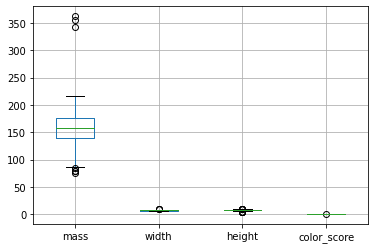

In [12]:
boxplot = fruits.boxplot(column=['mass','width','height', 'color_score'])

## Normaliseren

We gaan daarom de features normaliseren. Dat doen we door handmatig de Z-score te berekenen.
De Z-score kon je berekenen met: 
- (waarde van item i in kolom x - gemiddelde waarde kolom x) / standaard deviatie kolom x

en dat uiteraard voor alle items i.

**Belangrijk**: je wilt die genormaliseerde gegevens later gebruiken, dus je slaat ze op in nieuwe kolommen

In [13]:
fruits['mass_norm'] = (fruits['mass']-fruits['mass'].mean())/fruits['mass'].std()
fruits['width_norm'] = (fruits['width']-fruits['width'].mean())/fruits['width'].std()
fruits['height_norm'] = (fruits['height']-fruits['height'].mean())/fruits['height'].std()
fruits['color_score_norm'] = (fruits['color_score']-fruits['color_score'].mean())/fruits['color_score'].std()
fruits.head(5)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score,mass_norm,width_norm,height_norm,color_score_norm
0,1,apple,granny_smith,192,8.4,7.3,0.55,0.524936,1.585084,-0.288917,-2.769820
1,1,apple,granny_smith,180,8.0,6.8,0.59,0.306829,1.095451,-0.656289,-2.249376
2,1,apple,granny_smith,176,7.4,7.2,0.60,0.234126,0.361001,-0.362391,-2.119265
3,2,mandarin,mandarin,86,6.2,4.7,0.80,-1.401677,-1.107899,-2.199253,0.482954
4,2,mandarin,mandarin,84,6.0,4.6,0.79,-1.438028,-1.352716,-2.272727,0.352843


Je ziet nu dat de gemiddeldes van de nieuwe kolommen nagenoeg hetzelfde zijn en conform de verwachtingen: gemiddelde = 0 en standaard deviatie = 1

In [14]:
fruits[['mass_norm', 'width_norm', 'height_norm', 'color_score_norm']].round(2).describe()

,mass_norm,width_norm,height_norm,color_score_norm
count,59.000000,59.000000,59.000000,59.000000
mean,-0.000339,-0.000169,-0.000339,-0.002542
std,0.999926,1.000420,0.999762,0.999147
min,-1.580000,-1.600000,-2.710000,-2.770000
25%,-0.420000,-0.620000,-0.360000,-0.560000
50%,-0.090000,0.120000,-0.070000,-0.170000
75%,0.250000,0.480000,0.370000,0.610000
max,3.610000,3.050000,2.060000,2.170000


De boxplots van de features tonen aan dat de spreidingen nu wel vergelijkbaar zijn.
Ze zijn niet hetzelfde, maar dat hoeft natuurlijk ook niet: het blijven verschillende waardes.


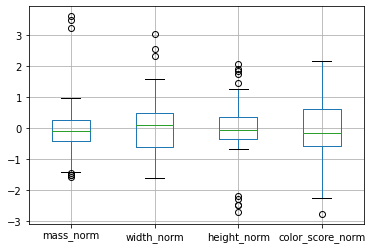

In [15]:
boxplot = fruits.boxplot(column=['mass_norm','width_norm','height_norm', 'color_score_norm'])

## Correlatie

Met behulp van de pairplot van Seaborn kun je heel eenvoudig scatter plots van verschillende kolommen maken
Hiermee kun je zelf al inschatten of er sprake is van correlatie tussen de verschillende kolommen


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

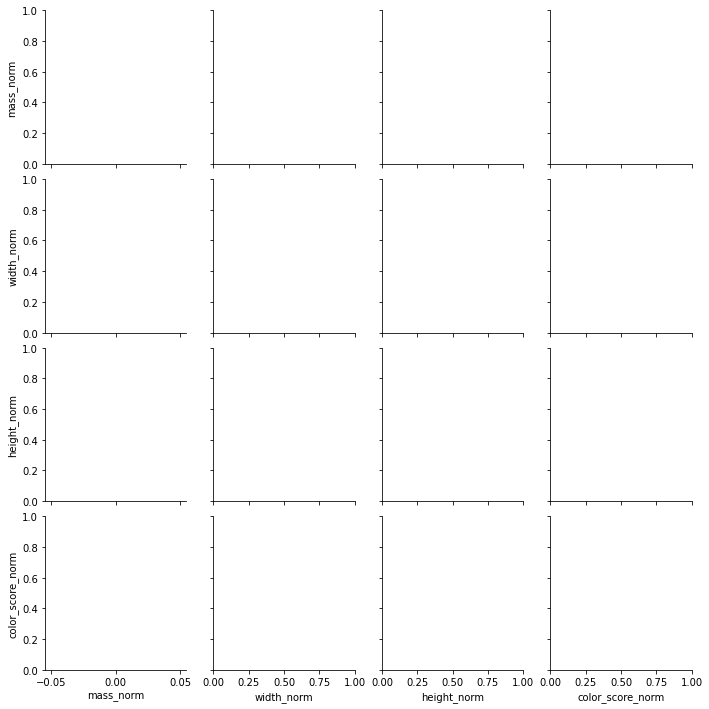

In [16]:
sns.pairplot(fruits[['mass_norm','width_norm','height_norm', 'color_score_norm']])

Met oude versies van Matplotlib en Seaborn kon je het Pearson coëfficient in de pairplot weergeven, maar dat lukt (mij in ieder geval...) nu niet meer...
De correlatiematrix is een makkelijke manier om de verschillende coëfficienten weer te geven.

Merk op: je kan hier ook de originele waardes gebruiken, Pearson zet waardes eerst om naar een Z-score.


In [17]:
corrMatrix = fruits[['mass_norm','width_norm','height_norm', 'color_score_norm']].corr()
corrMatrix

,mass_norm,width_norm,height_norm,color_score_norm
mass_norm,1.000000,0.877687,0.609571,-0.079794
width_norm,0.877687,1.000000,0.396848,-0.076576
height_norm,0.609571,0.396848,1.000000,-0.247047
color_score_norm,-0.079794,-0.076576,-0.247047,1.000000


Aangezien wij visueel ingesteld zijn, kunnen we deze waardes beter weergeven in een heatmap.
Hierin kun je sneller zien welke kolommen goed en niet goed correleren

<AxesSubplot:>

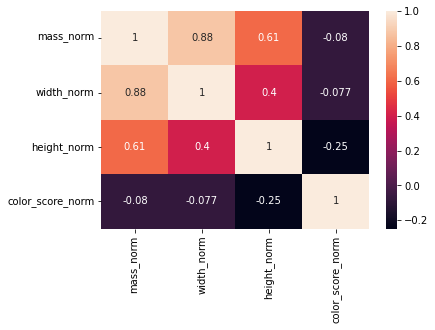

In [18]:
sns.heatmap(corrMatrix, annot=True)